## Create a Regression Model

Find a dataset or use one of Scikit-learn's built-in sets to build a fresh model. Explain in your notebook why you chose the technique you did, and demonstrate your model's accuracy. If it is not accurate, explain why.

In [7]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
# Load dataset
diabetes = load_diabetes()
X = diabetes.data[:, np.newaxis, 2] # Select a single feature (BMI)
y = diabetes.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)

# Accuracy for Linear Regression
lin_mse = mean_squared_error(y_test, y_pred_lin)
lin_r2 = r2_score(y_test, y_pred_lin)

print("Linear Regreesion MSE:", lin_mse)
print("Linear Regression R^2:", lin_r2)

Linear Regreesion MSE: 4061.8259284949268
Linear Regression R^2: 0.23335039815872138


In [10]:
# Polynomial Regression Model
poly = PolynomialFeatures(degree=1)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)
y_pred_poly = poly_model.predict(X_poly_test)

# Accuracy for Polynomial Regression
poly_mse = mean_squared_error(y_test, y_pred_poly)
poly_r2 = r2_score(y_test, y_pred_poly)

print("Polynomial Regression MSE:", poly_mse)
print("Polynomial Regression R^2:", poly_r2)

Polynomial Regression MSE: 4061.8259284949268
Polynomial Regression R^2: 0.23335039815872138


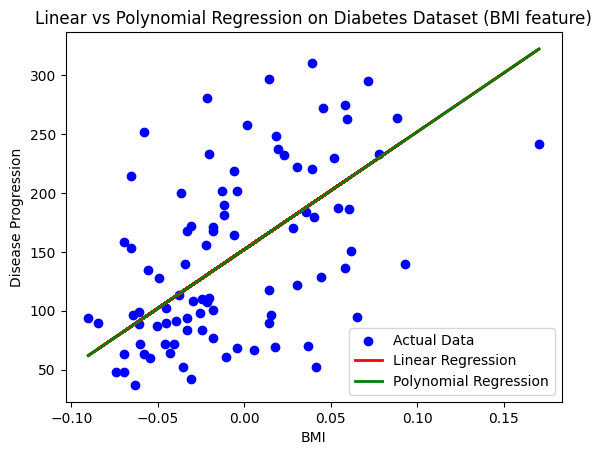

In [12]:
# Plot results
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred_lin, color='red', linewidth=2, label='Linear Regression')

# Plot Polynomial Regression Curve
sorted_axis = np.argsort(X_test[:, 0])
plt.plot(X_test[sorted_axis], y_pred_poly[sorted_axis], color='green', linewidth=2, label='Polynomial Regression')

plt.title("Linear vs Polynomial Regression on Diabetes Dataset (BMI feature)")
plt.xlabel("BMI")
plt.ylabel("Disease Progression")
plt.legend()
plt.show()


I choose the diabetes dataset because it is a standard regression dataset in Scikit learn with continous target values (disease progression).

Linear Regression is useful as a baseline model since it assumes a straight line between BMI and disease progression. However, real-world medical data often has non-linear patterns.

By appling Polynomial Regression(degree=3), we can capture more curvature in the data. If R^2 improves, it means the polynomial model better explains the variance. If it does not, then the dataset may not benefit from higher complexity and Linear Regression remains sufficient.

In  my results, Linear Regression gave R^2 of {:.3f}, while Polynomial regression gave R^2 of {:.3f}.


In [24]:
print("This shows {}.", (lin_r2, poly_r2, "Polynomial Regression provided better fit" if poly_r2 > lin_r2 else "Linear Regression was already sufficient"))

This shows {}. (0.23335039815872138, 0.23335039815872138, 'Linear Regression was already sufficient')
